In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
asthma_disease_df = pd.read_csv("../data/asthma_disease_data.csv")

In [3]:
asthma_disease_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [4]:
 asthma_disease_df.shape

(2392, 29)

In [5]:
asthma_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [6]:
 asthma_disease_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [7]:
# remove PatientID and DoctorInCharge columns , eacuse they do not bring any valuable inforamtion
# that can be used

columns = [
    "Age", 
    "Gender", 
    "Ethnicity", 
    "EducationLevel", 
    "BMI",
    "Smoking", 
    "PhysicalActivity", 
    "DietQuality", 
    "SleepQuality",
    "PollutionExposure", 
    "PollenExposure", 
    "DustExposure", 
    "PetAllergy",
    "FamilyHistoryAsthma", 
    "HistoryOfAllergies", 
    "Eczema", 
    "HayFever",
    "GastroesophagealReflux", 
    "LungFunctionFEV1", 
    "LungFunctionFVC",
    "Wheezing", 
    "ShortnessOfBreath", 
    "ChestTightness", 
    "Coughing",
    "NighttimeSymptoms", 
    "ExerciseInduced", 
    "Diagnosis",
]

In [8]:
asthma_disease_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2392.0,6229.500000,690.655244,5034.000000,5631.750000,6229.500000,6827.250000,7425.000000
Age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
Gender,2392.0,0.493311,0.500060,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2392.0,0.669732,0.986120,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2392.0,1.307274,0.898242,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
Smoking,2392.0,0.141722,0.348838,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalActivity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
DietQuality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
SleepQuality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235


In [9]:
asthma_disease_df_corr = asthma_disease_df[columns].corr().T.round(3)

asthma_disease_df_corr

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
Age,1.000,-0.003,0.020,-0.007,0.016,-0.009,0.000,0.004,0.003,-0.042,...,0.020,-0.008,0.010,0.008,0.025,-0.006,0.029,-0.026,0.016,-0.015
Gender,-0.003,1.000,0.019,-0.027,0.024,-0.013,0.022,-0.015,-0.023,0.001,...,-0.003,0.013,-0.028,-0.013,0.021,0.000,-0.008,-0.005,0.029,0.003
Ethnicity,0.020,0.019,1.000,0.004,0.014,-0.007,0.037,0.009,-0.010,-0.038,...,-0.015,-0.018,0.032,-0.012,0.019,-0.013,-0.027,0.015,0.015,0.017
EducationLevel,-0.007,-0.027,0.004,1.000,0.005,0.013,-0.015,-0.037,0.018,0.027,...,0.024,-0.003,-0.002,0.014,0.009,-0.032,-0.018,-0.001,-0.008,0.008
BMI,0.016,0.024,0.014,0.005,1.000,0.005,-0.012,-0.015,-0.013,-0.029,...,0.010,-0.010,0.003,0.046,0.015,-0.010,-0.004,-0.001,0.012,-0.013
Smoking,-0.009,-0.013,-0.007,0.013,0.005,1.000,0.014,-0.027,-0.012,0.011,...,0.034,0.016,0.016,-0.005,-0.059,-0.011,-0.014,0.014,-0.003,-0.019
PhysicalActivity,0.000,0.022,0.037,-0.015,-0.012,0.014,1.000,0.049,0.007,-0.030,...,-0.035,0.016,-0.030,0.014,-0.025,-0.029,0.001,-0.009,-0.004,0.005
DietQuality,0.004,-0.015,0.009,-0.037,-0.015,-0.027,0.049,1.000,0.014,0.007,...,0.021,-0.007,-0.002,0.039,0.036,0.013,-0.013,0.022,-0.024,-0.003
SleepQuality,0.003,-0.023,-0.010,0.018,-0.013,-0.012,0.007,0.014,1.000,-0.029,...,-0.035,-0.004,0.001,0.011,-0.011,-0.007,0.015,-0.005,-0.026,0.018
PollutionExposure,-0.042,0.001,-0.038,0.027,-0.029,0.011,-0.030,0.007,-0.029,1.000,...,0.006,-0.024,0.028,-0.007,0.019,0.027,0.006,0.015,-0.009,-0.005


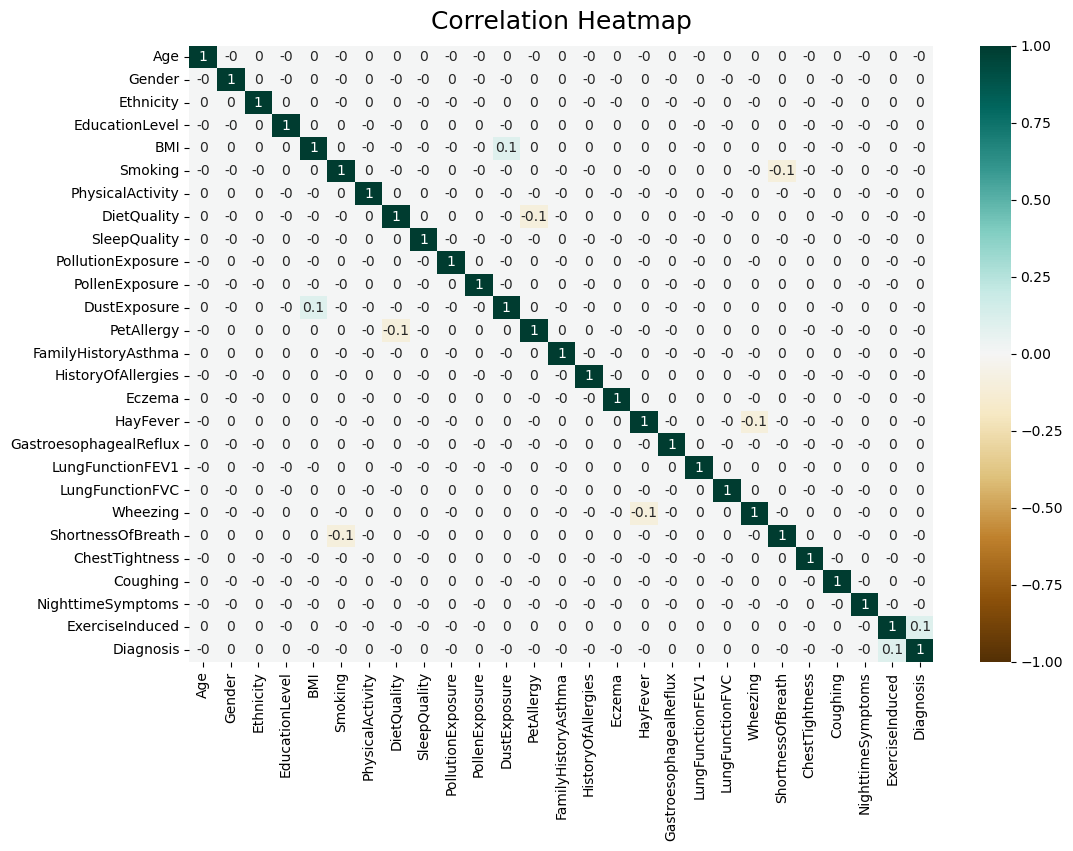

In [10]:
# Create a correlation heatmap plot
plt.figure(figsize = (12, 8))

heatmap_asthma_disease_df_corr = sns.heatmap(asthma_disease_df_corr.round(1), vmin = -1, vmax = 1, annot = True, cmap = "BrBG")
heatmap_asthma_disease_df_corr.set_title("Correlation Heatmap", fontdict = {"fontsize" : 18}, pad = 12)

plt.show()

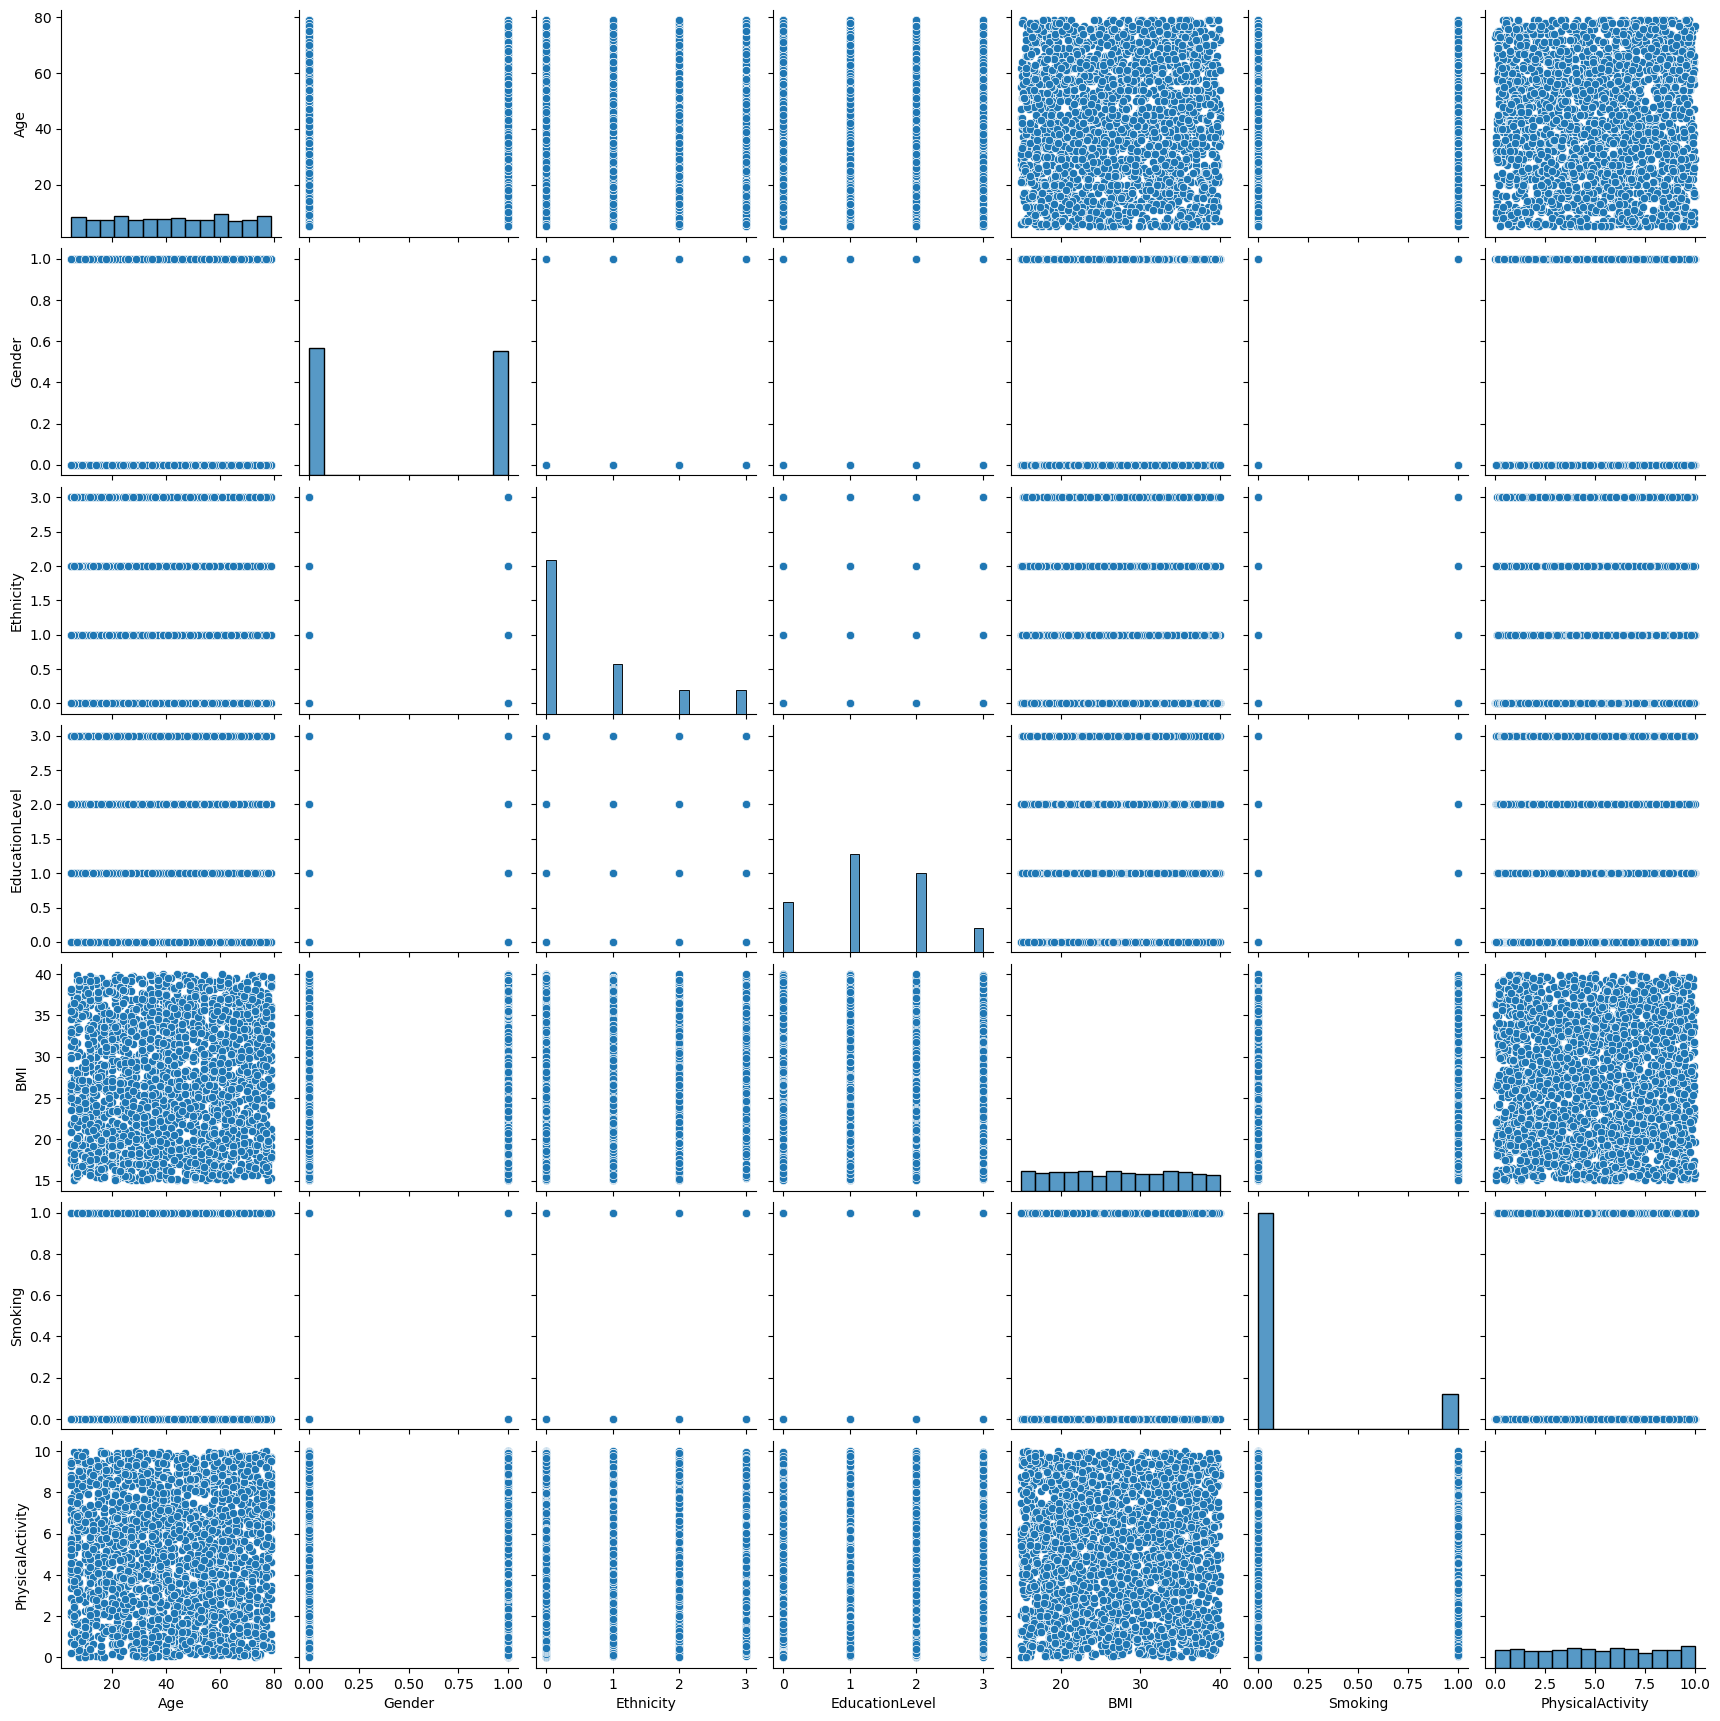

In [11]:
sns.pairplot(asthma_disease_df[columns[:7]])
plt.show()

In [12]:
# Create a function to display plot histogram
def plot_histogram(data, bins=10, title="Histogram", xlabel="Values", ylabel="Frequency", color="grey", edgecolor="black"):
    """Plots a histogram with frequency numbers displayed on each bar
    Parameters:
        - data: The data to be plotted (list or numpy array)
        - bins: Number of bins (default is 10)
        - title: The title of the histogram (default is "Histogram")
        - xlabel: The label for the x-axis (default is "Values")
        - ylabel: The label for the y-axis (default is "Frequency")
        - color: The color of the bars (default is "gray")
        - edgecolor: The color of the bar edges (default is "black")
    """
    plt.figure(figsize=(12, 3))
    
    # Create histogram and get the data
    n, bins, patches = plt.hist(data, bins=bins, color=color, edgecolor=edgecolor)
    
    # Add numbers on top of each bar
    for i in range(len(n)):
        # Calculate the center of each bin for x-position
        bin_center = (bins[i] + bins[i+1]) / 2
        # Add text with the count, positioned slightly above the bar
        plt.text(bin_center, n[i] + max(n) * 0.01, str(int(n[i])), 
                ha='center', va='bottom', fontweight='bold')
    
    # Adjust y-axis to accommodate the text
    plt.ylim(0, max(n) * 1.1)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

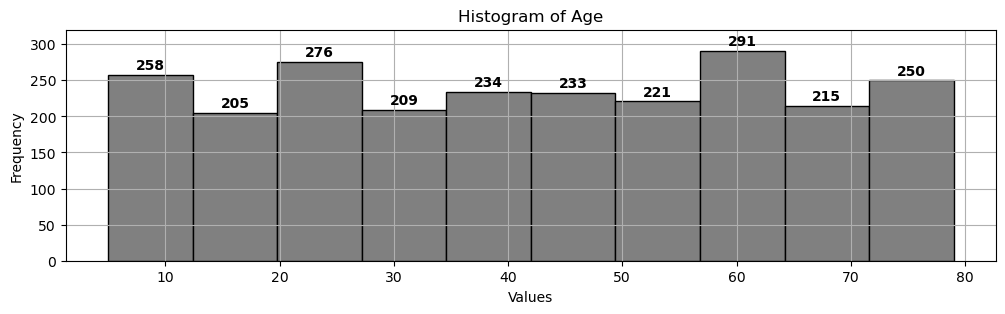

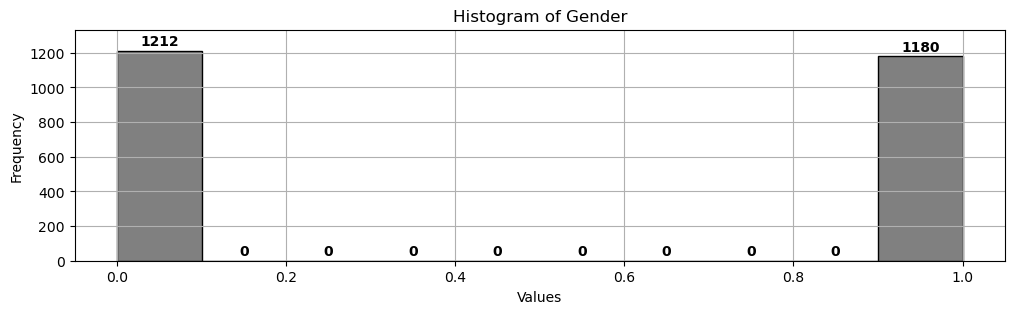

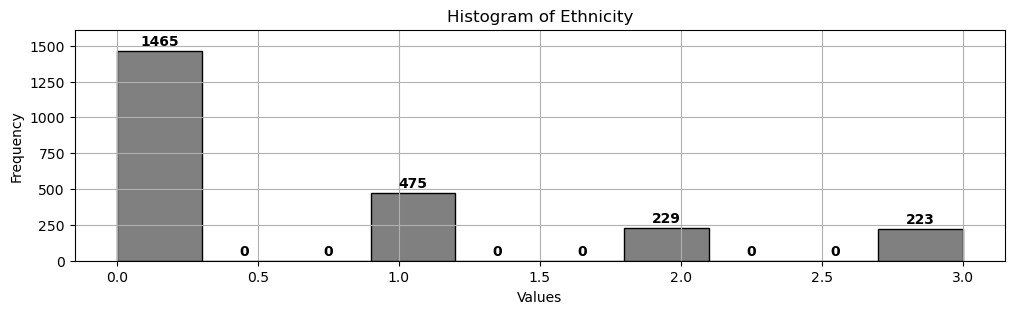

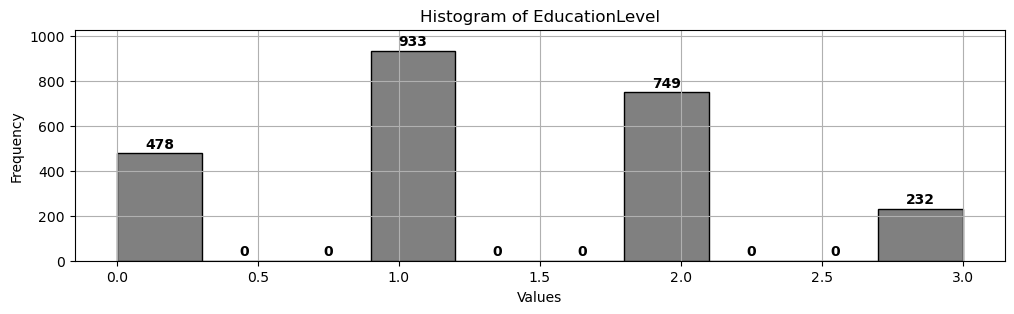

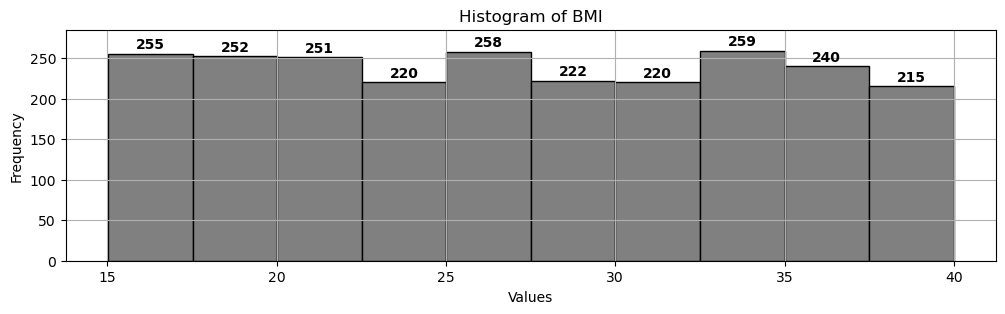

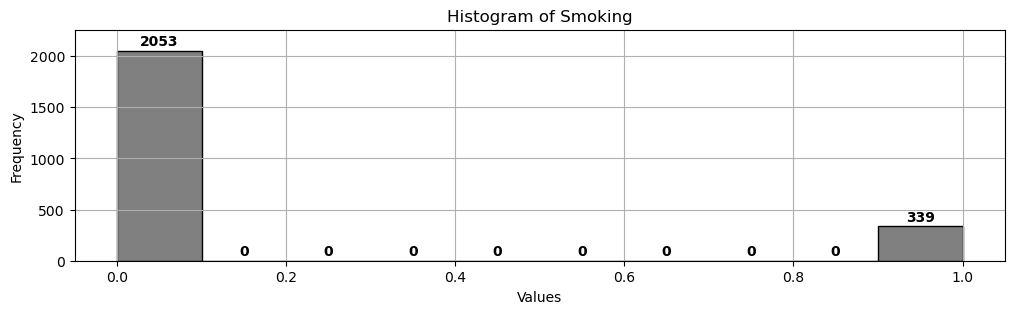

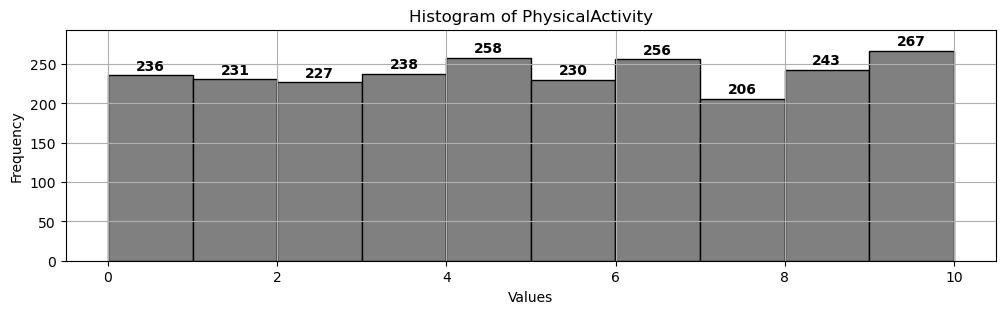

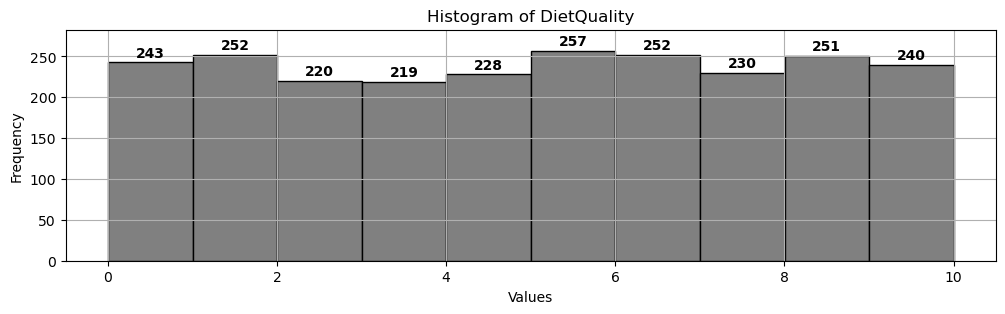

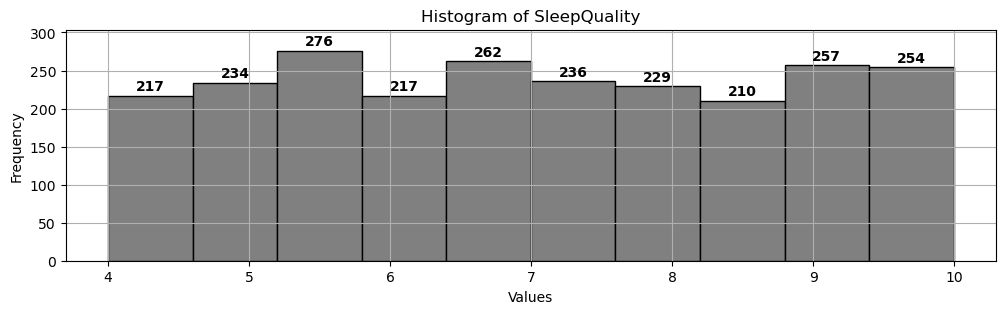

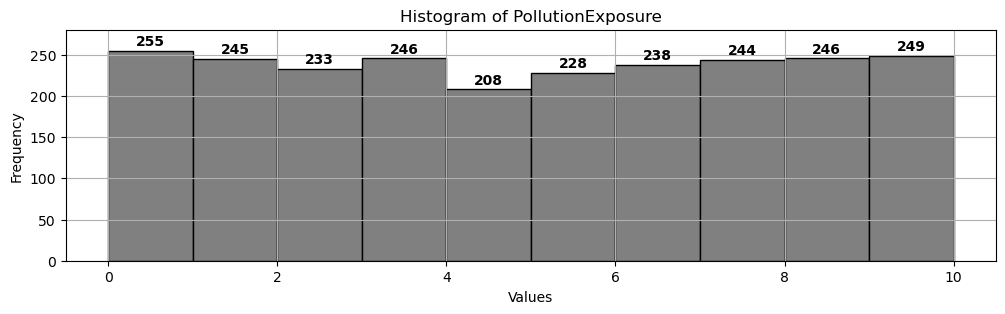

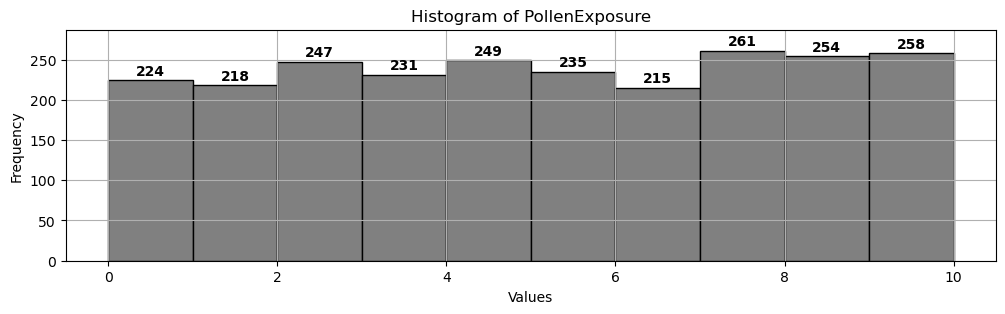

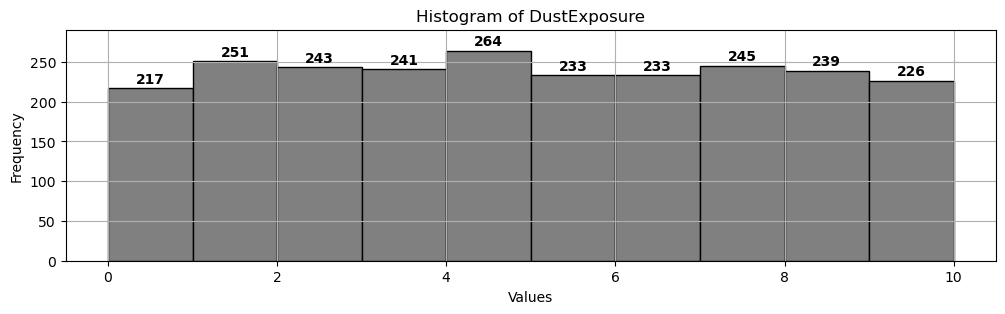

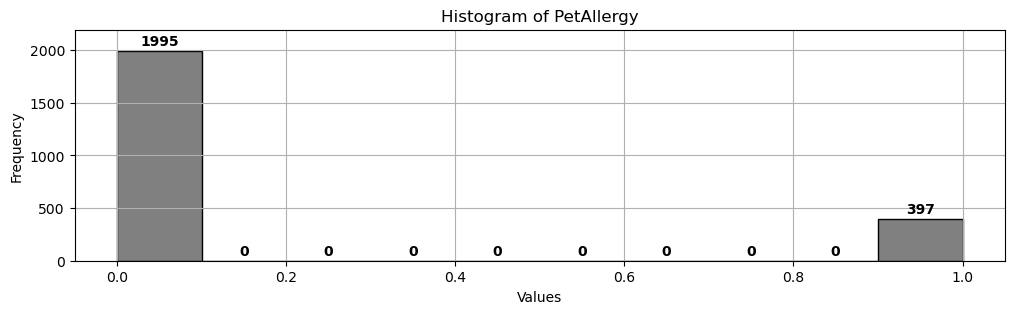

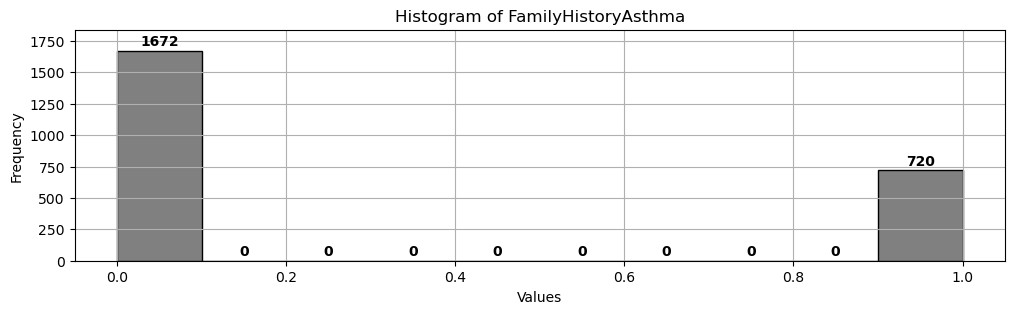

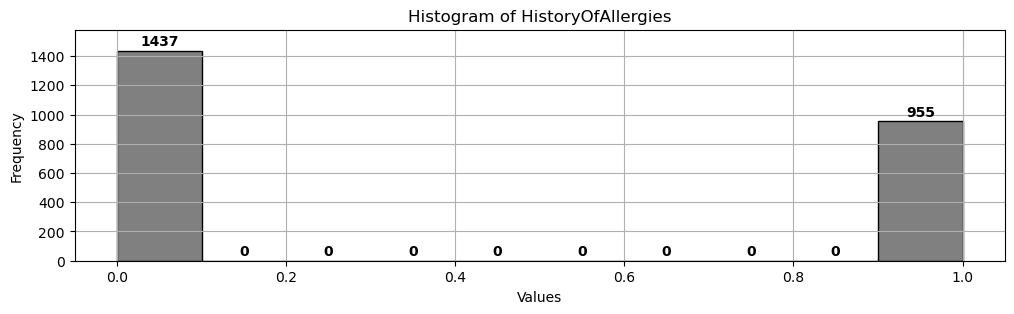

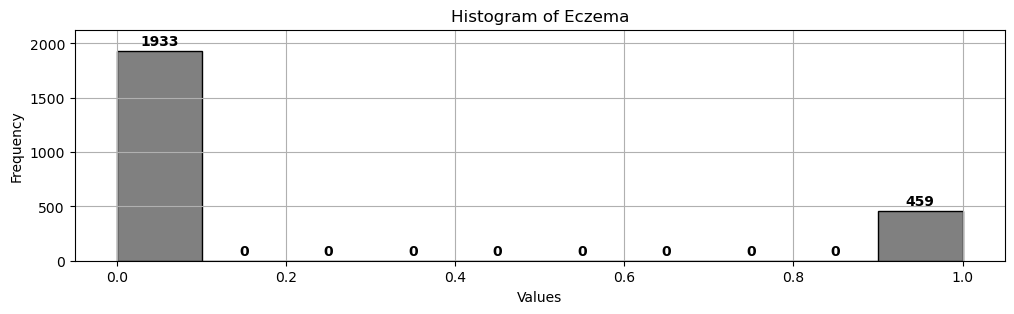

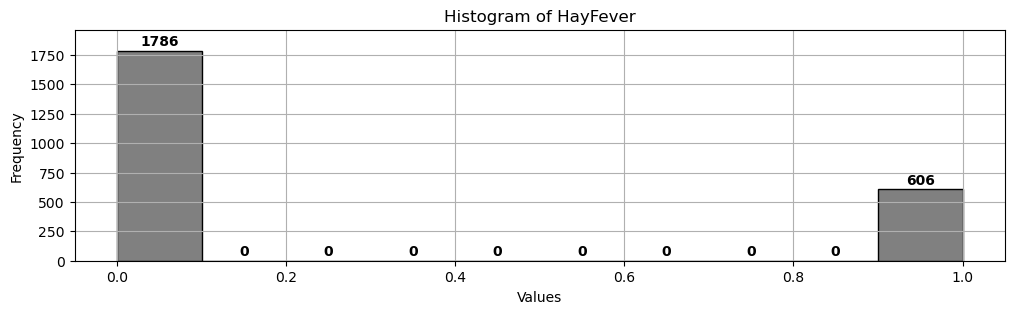

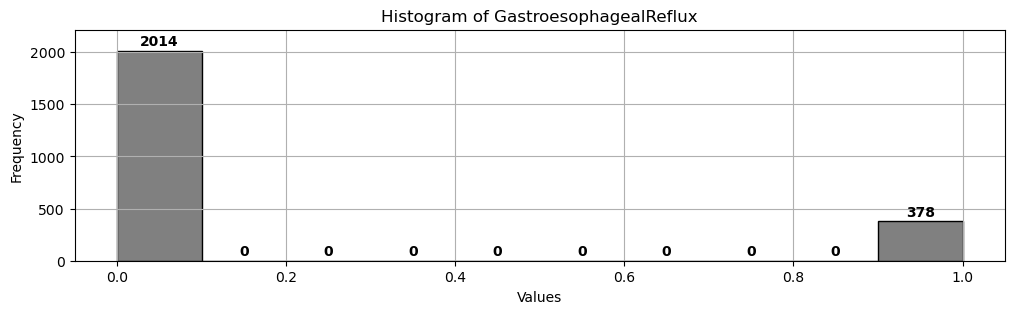

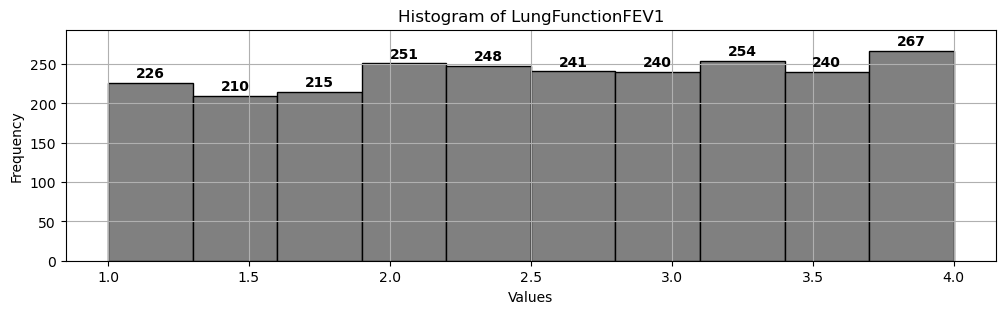

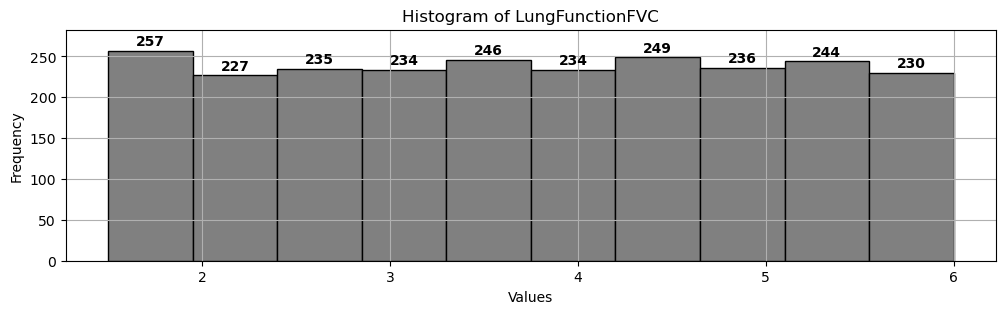

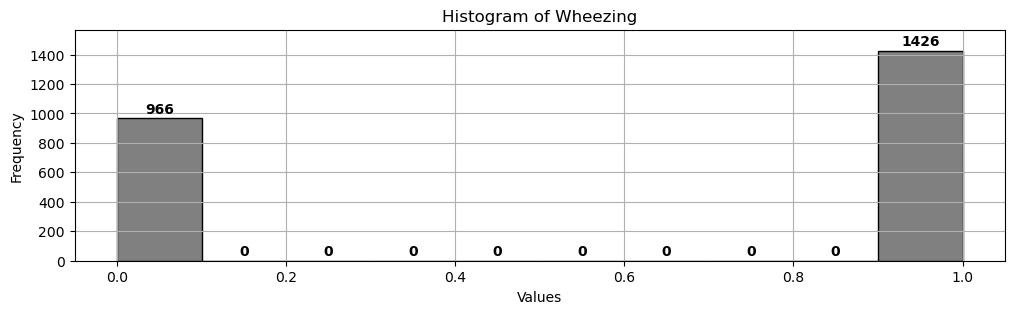

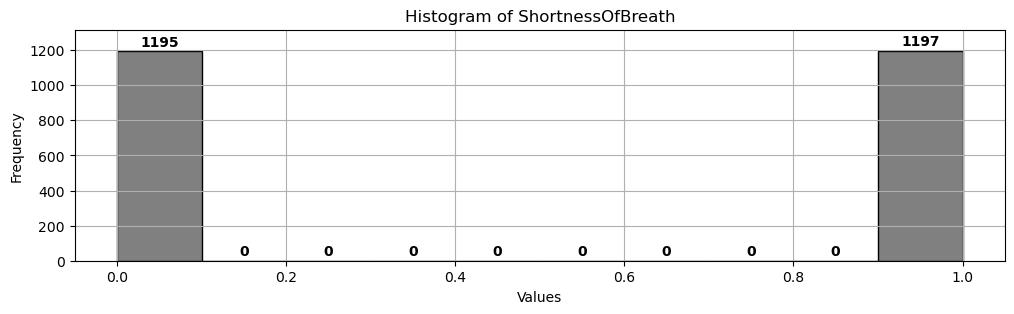

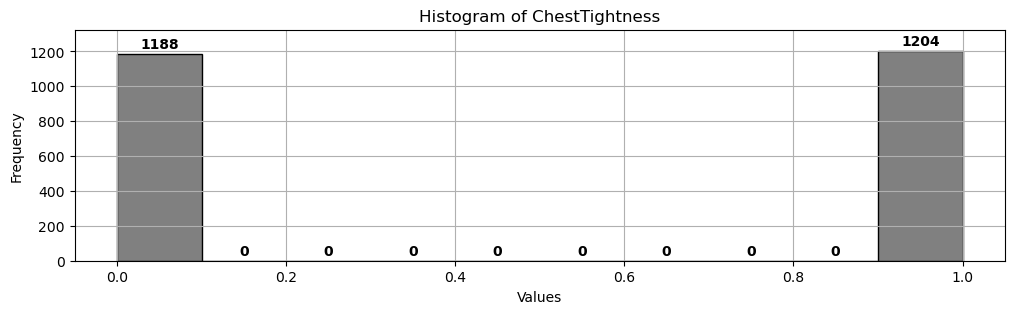

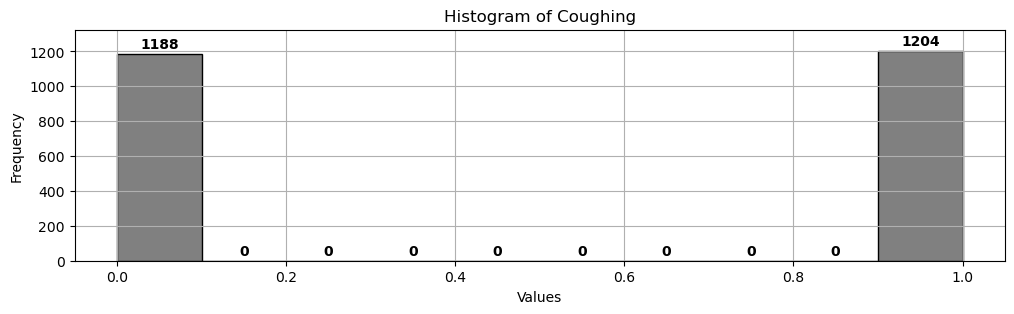

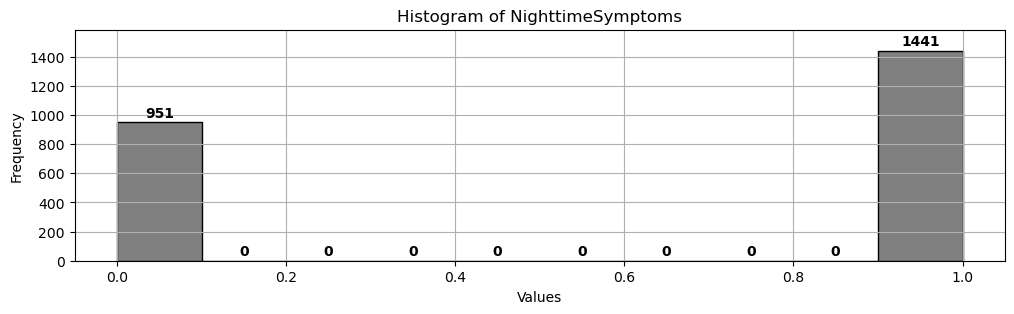

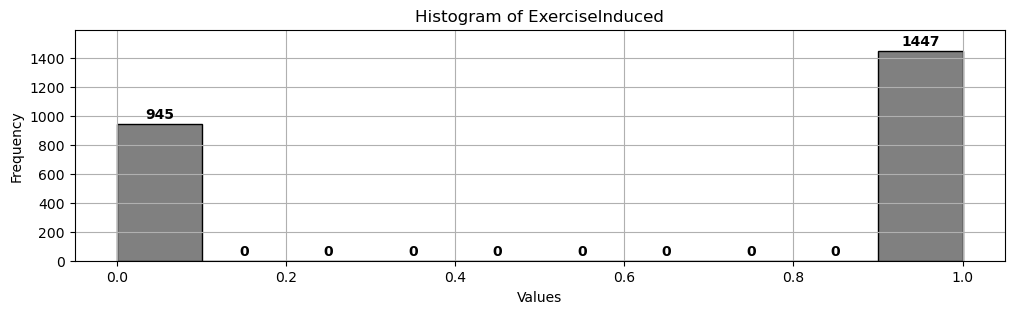

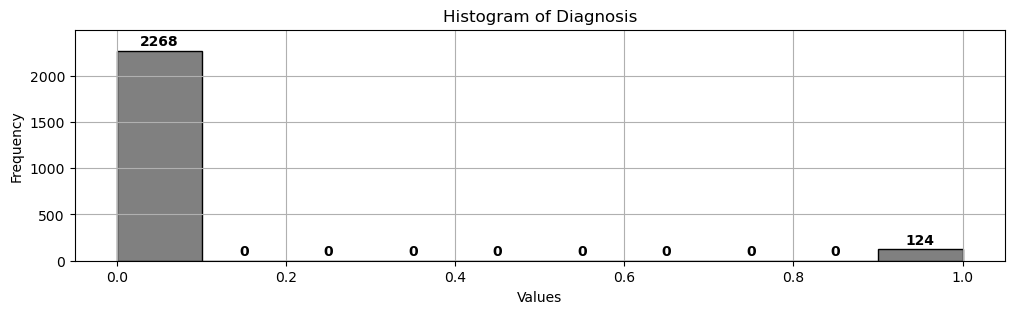

In [13]:
# Display for each column a histogram plot
for column in columns:
    plot_histogram(asthma_disease_df[column], title = f"Histogram of {column}")

In [14]:
def plot_count(data, column, title="Value Counts", xlabel=None, ylabel="Count", rotation=0):
    """
    Plots a countplot for a given categorical variable in the dataset.

    Parameters:
    - data: The DataFrame containing the data.
    - column: The column name (string) for the categorical variable to plot.
    - title: The title of the plot (default is "Value Counts").
    - xlabel: The label for the x-axis (default is None, which will use the column name).
    - ylabel: The label for the y-axis (default is "Count").
    - rotation: Rotation angle for x-axis labels (default is 0).
    """
    plt.figure(figsize=(12, 3))
    
    # Create countplot and get the axes object
    ax = sns.countplot(x=column, data=data, hue = column)
    
    # Add numbers on top of each bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height * 0.01,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    # Adjust y-axis to accommodate the numbers
    ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
    
    plt.title(title)
    plt.xlabel(xlabel if xlabel else column)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.grid(True, axis="y")
    plt.show()

In [15]:
columns_count = [
    "Age", 
    "Gender", 
    "Ethnicity", 
    "EducationLevel", 
    "Smoking", 
    "PetAllergy",
    "FamilyHistoryAsthma", 
    "HistoryOfAllergies", 
    "Eczema", 
    "HayFever",
    "GastroesophagealReflux", 
    "Wheezing", 
    "ShortnessOfBreath", 
    "ChestTightness", 
    "Coughing",
    "NighttimeSymptoms", 
    "ExerciseInduced", 
    "Diagnosis",
]

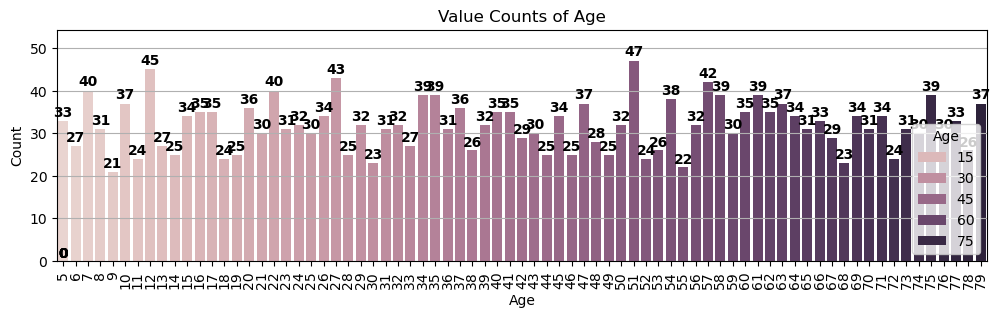

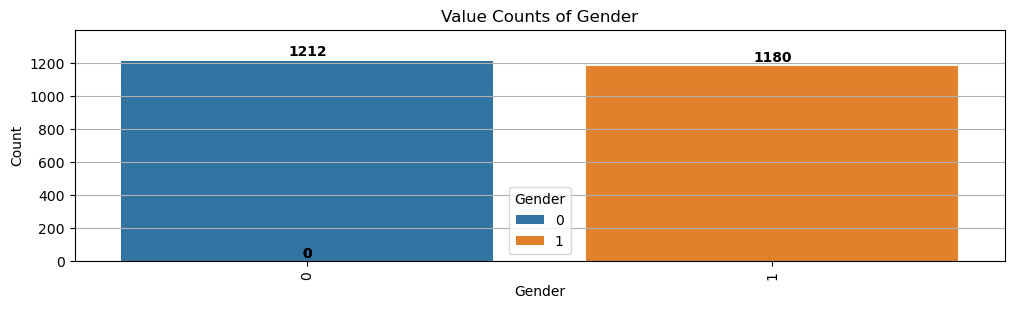

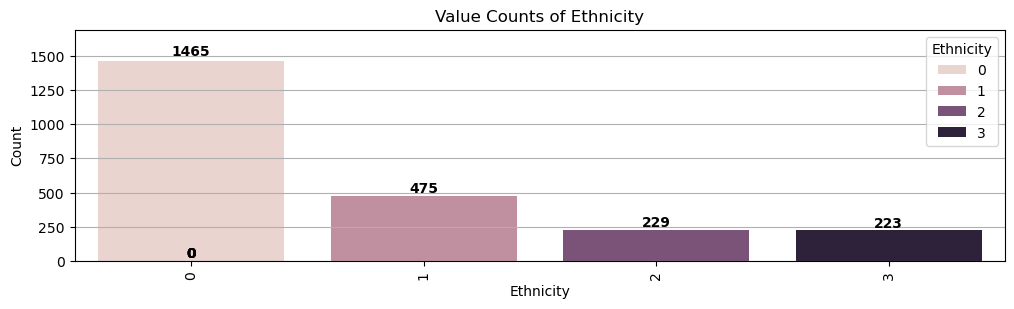

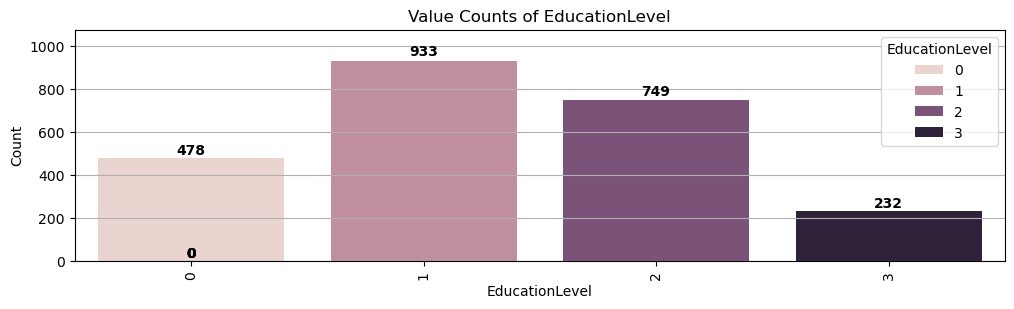

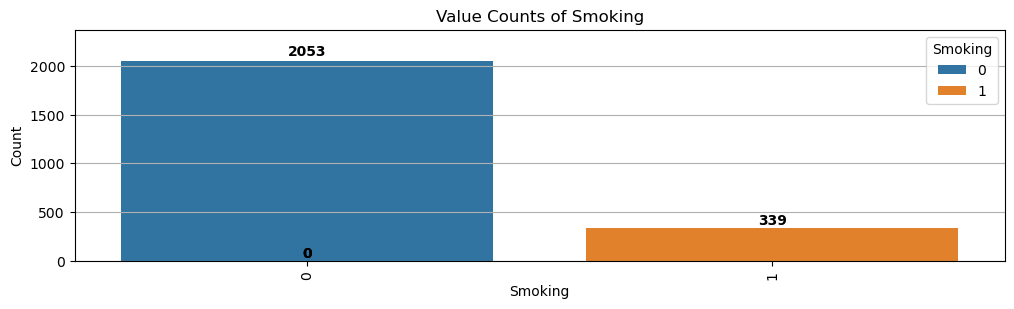

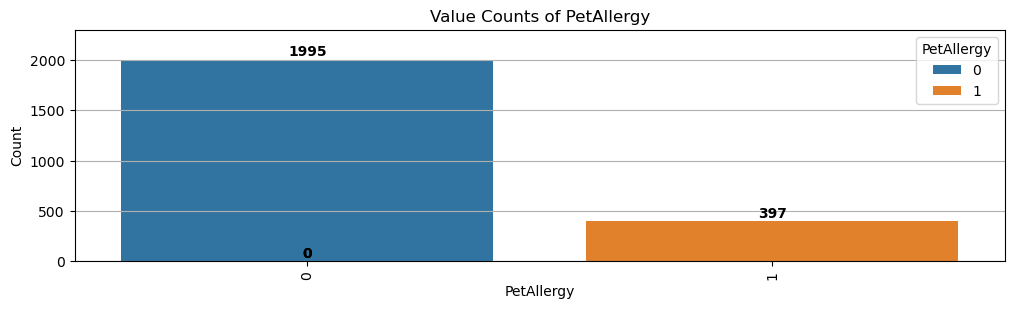

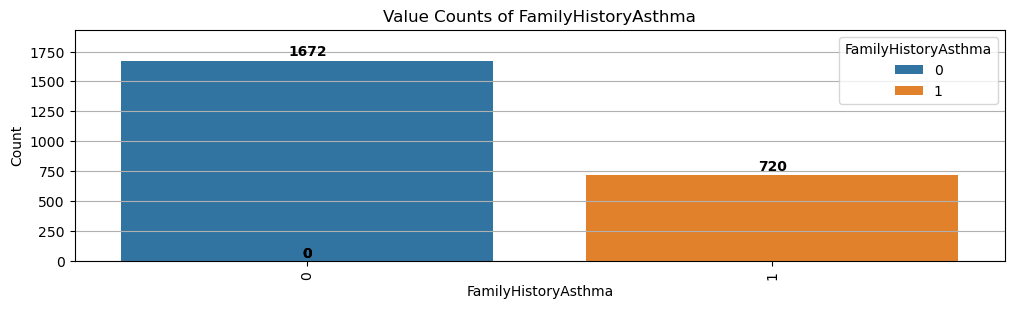

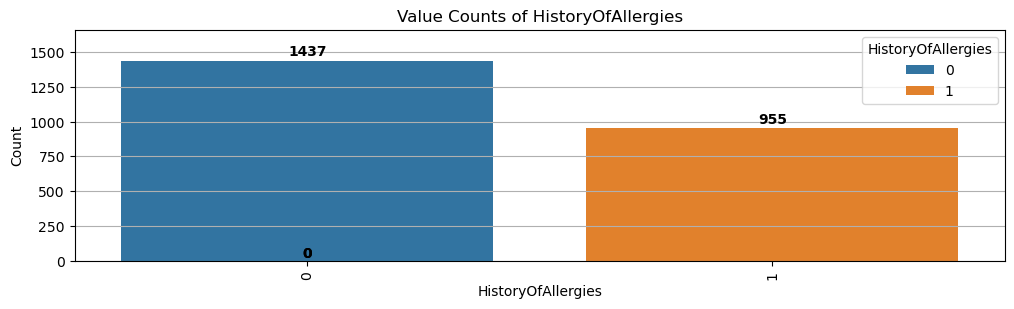

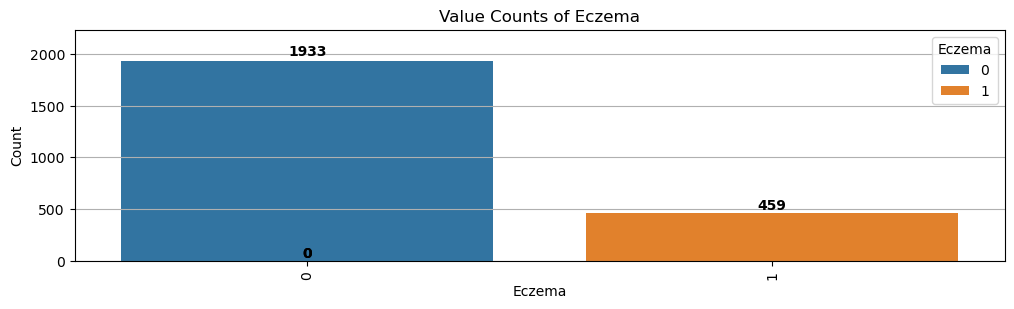

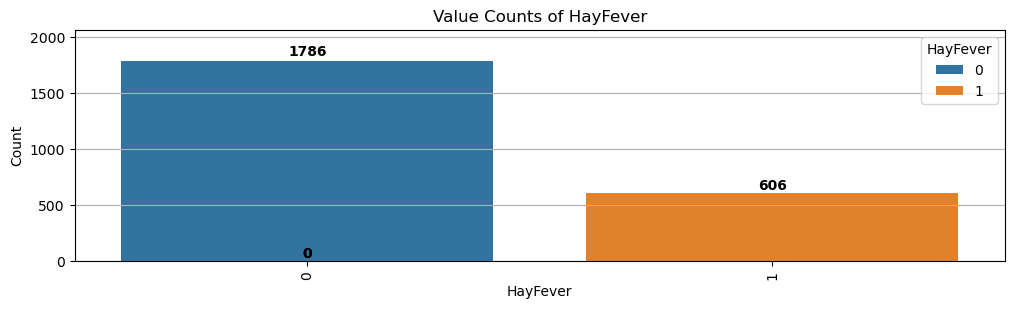

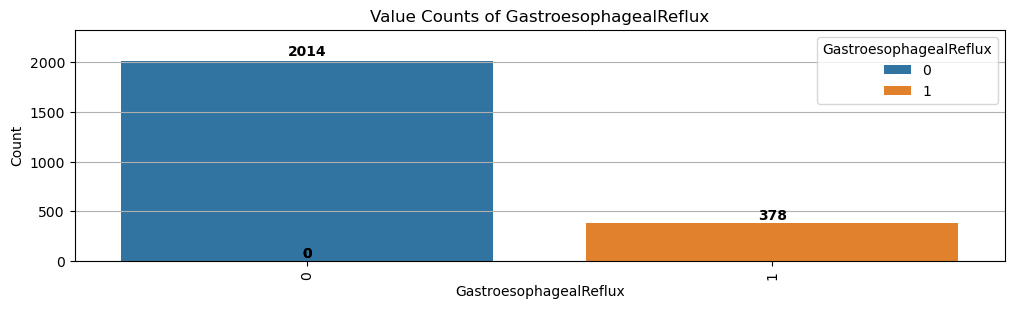

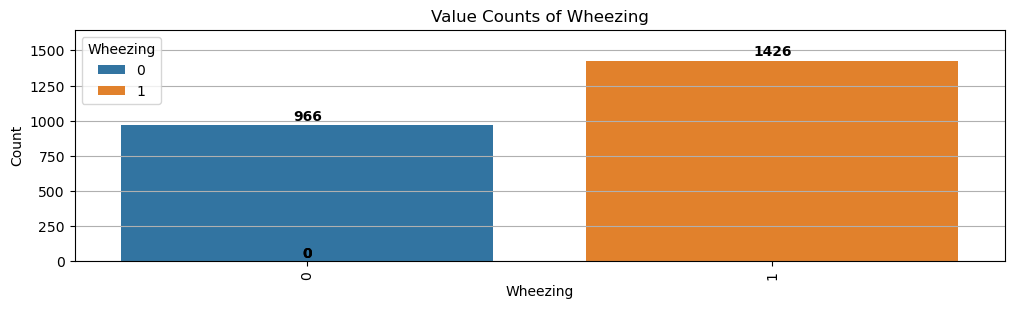

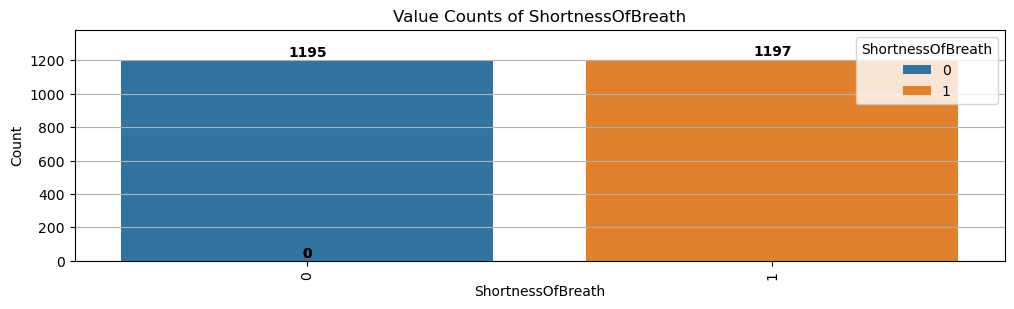

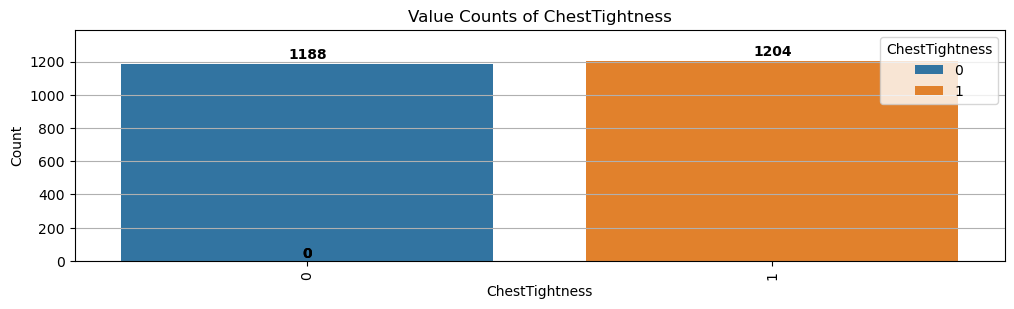

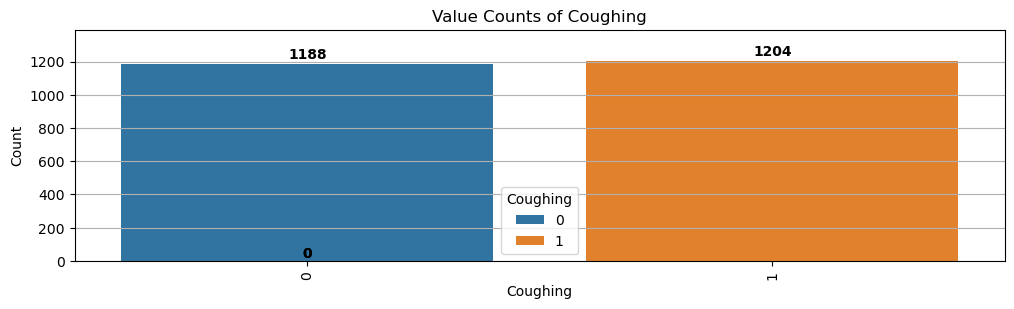

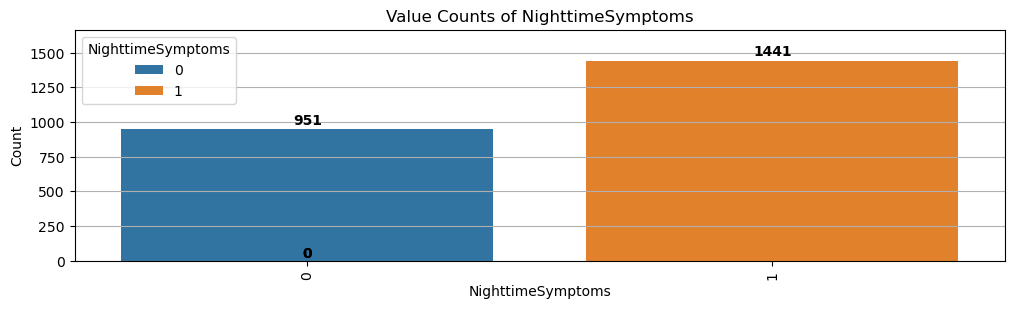

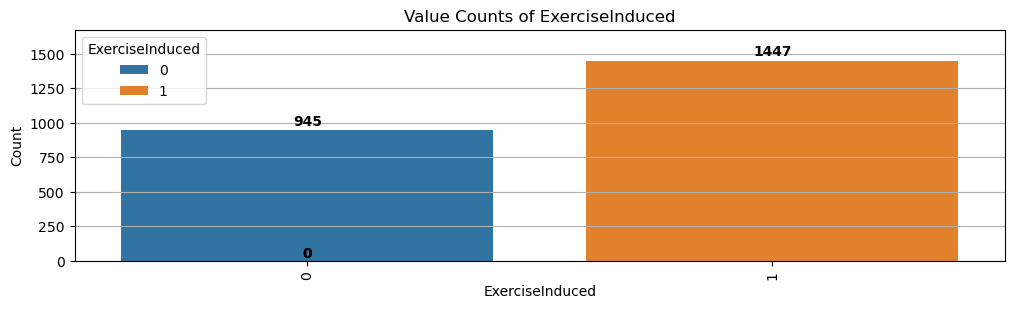

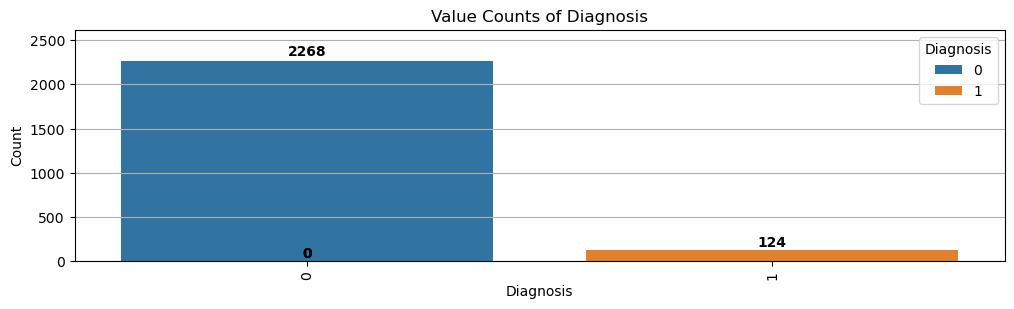

In [16]:
for column in columns_count:
    plot_count(data = asthma_disease_df, column = column, title = f"Value Counts of {column}", rotation = 90)

In [17]:
for column in columns:
    print(asthma_disease_df[column].value_counts())

Age
51    47
12    45
27    43
57    42
22    40
      ..
52    24
68    23
30    23
55    22
9     21
Name: count, Length: 75, dtype: int64
Gender
0    1212
1    1180
Name: count, dtype: int64
Ethnicity
0    1465
1     475
2     229
3     223
Name: count, dtype: int64
EducationLevel
1    933
2    749
0    478
3    232
Name: count, dtype: int64
BMI
15.848744    1
33.049449    1
37.458931    1
34.743797    1
29.095900    1
            ..
15.420466    1
22.600303    1
24.735924    1
26.110482    1
28.123021    1
Name: count, Length: 2392, dtype: int64
Smoking
0    2053
1     339
Name: count, dtype: int64
PhysicalActivity
0.894448    1
6.623081    1
6.875519    1
2.200373    1
5.837363    1
           ..
6.110344    1
2.452471    1
8.869639    1
6.033612    1
1.613138    1
Name: count, Length: 2392, dtype: int64
DietQuality
5.488696    1
6.205457    1
6.572507    1
5.237142    1
0.702779    1
           ..
3.843585    1
8.380381    1
6.800111    1
9.643192    1
7.412878    1
Name: count, 

In [18]:
asthma_disease_df[["Ethnicity", "Diagnosis"]].value_counts()

Ethnicity  Diagnosis
0          0            1392
1          0             450
2          0             218
3          0             208
0          1              73
1          1              25
3          1              15
2          1              11
Name: count, dtype: int64

In [19]:
asthma_disease_df.Diagnosis.value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [20]:
def plot_crosstab(data, row_col, col_col, title = "Cross-Tabulation Heatmap"):
    """
    Plots a heatmap of the cross-tabulation of two categorical variables.

    Parameters:
    - data (pd.DataFrame): DataFrame containing the data.
    - row_col (str): Column name for rows in the cross-tabulation.
    - col_col (str): Column name for columns in the cross-tabulation.
    - title (str): Title of the heatmap plot (default is "Cross-Tabulation Heatmap").

    Returns:
    - None: Displays the heatmap plot.
    """
    cross_tab = pd.crosstab(data[row_col], data[col_col])
    
    plt.figure(figsize = (12, 4))
    sns.heatmap(cross_tab, annot = True, cmap = "Blues", fmt = "d")
    plt.title(title)
    plt.xlabel(col_col)
    plt.ylabel(row_col)
    plt.show()

In [21]:
 columns_crosstab = [
    "Gender", 
    "Ethnicity", 
    "EducationLevel", 
    "Smoking", 
    "PetAllergy",
    "FamilyHistoryAsthma", 
    "HistoryOfAllergies", 
    "Eczema", 
    "HayFever",
    "GastroesophagealReflux", 
    "Wheezing", 
    "ShortnessOfBreath", 
    "ChestTightness", 
    "Coughing",
    "NighttimeSymptoms", 
    "ExerciseInduced", 
    "Diagnosis",
]

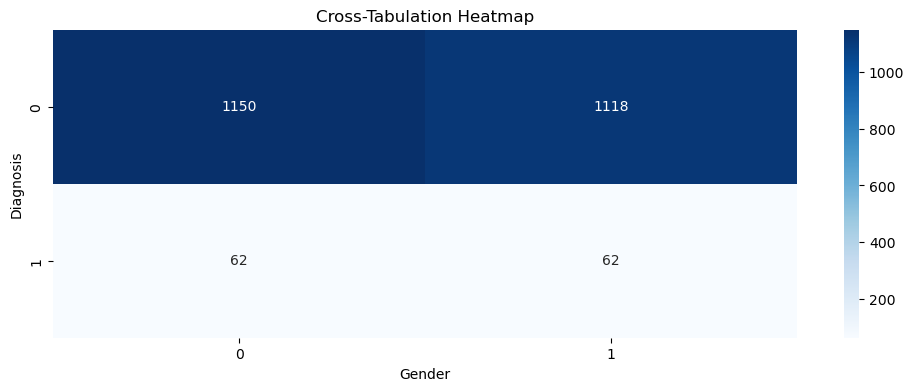

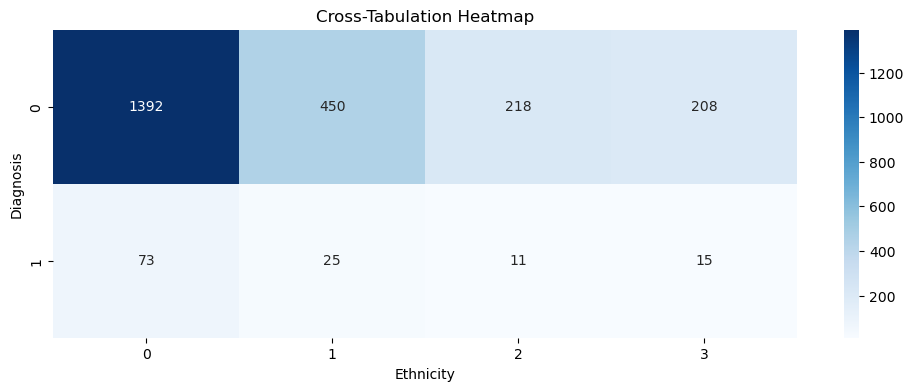

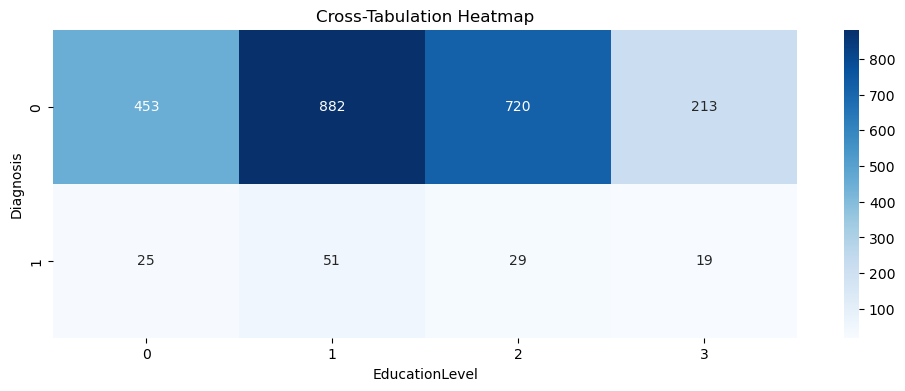

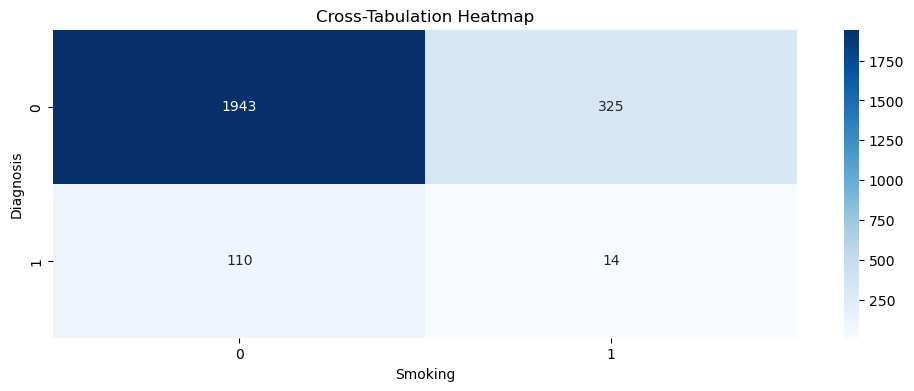

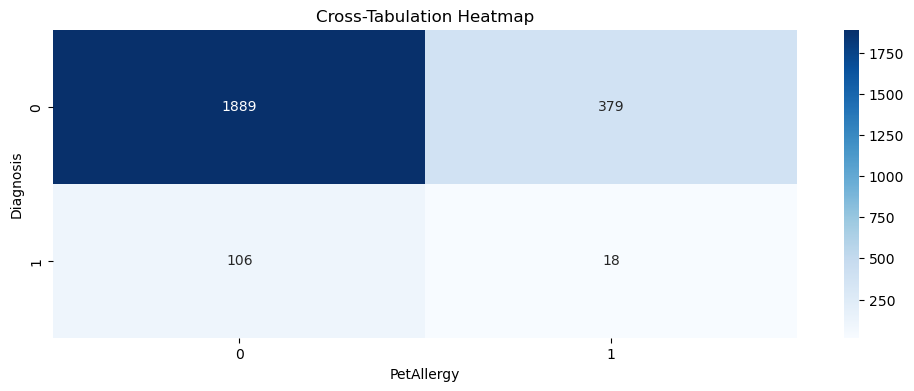

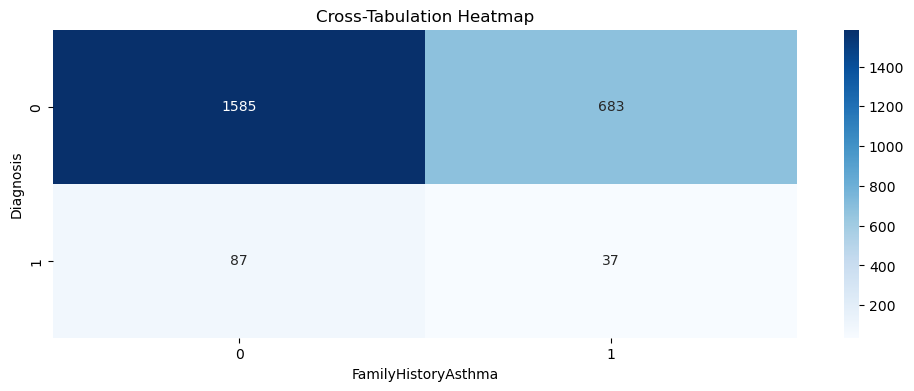

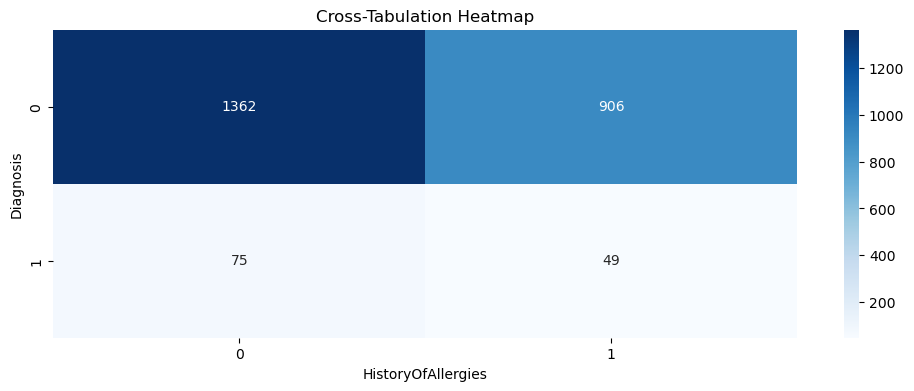

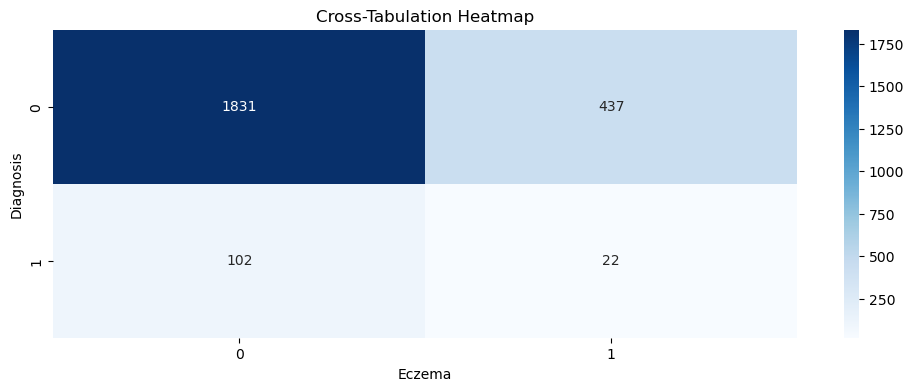

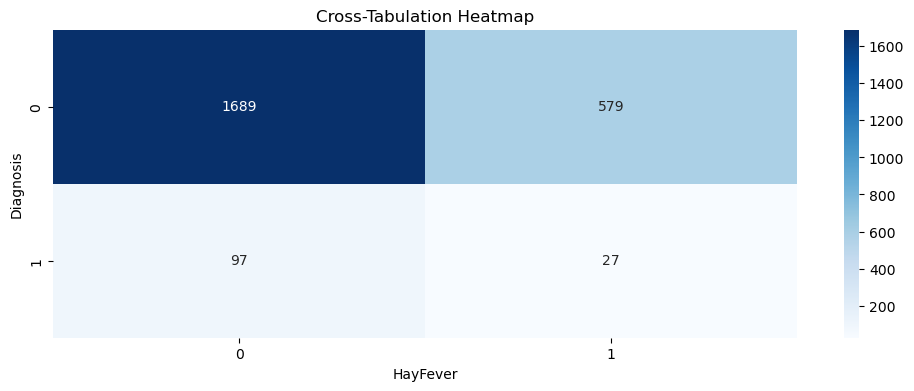

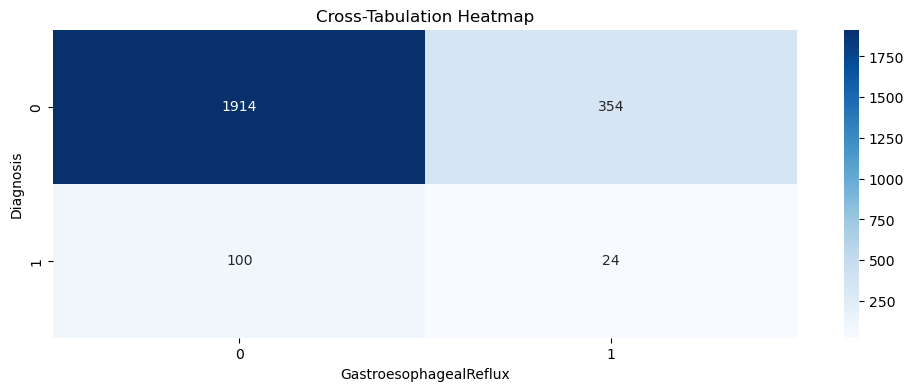

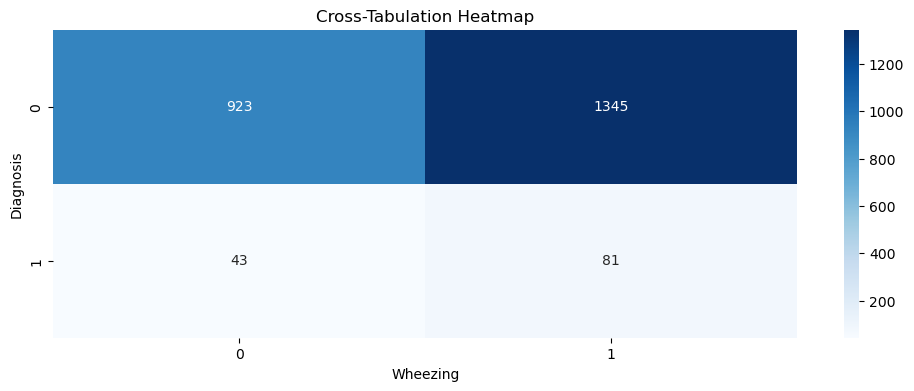

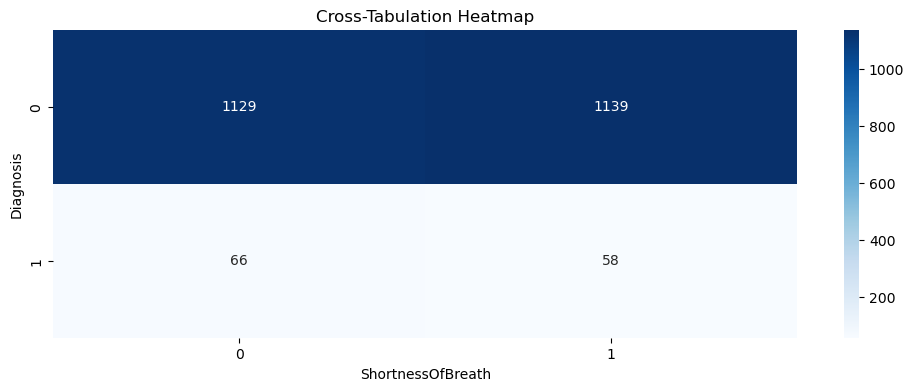

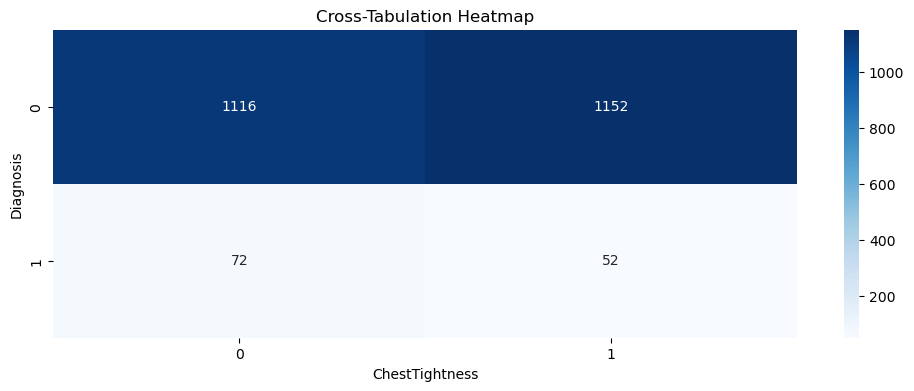

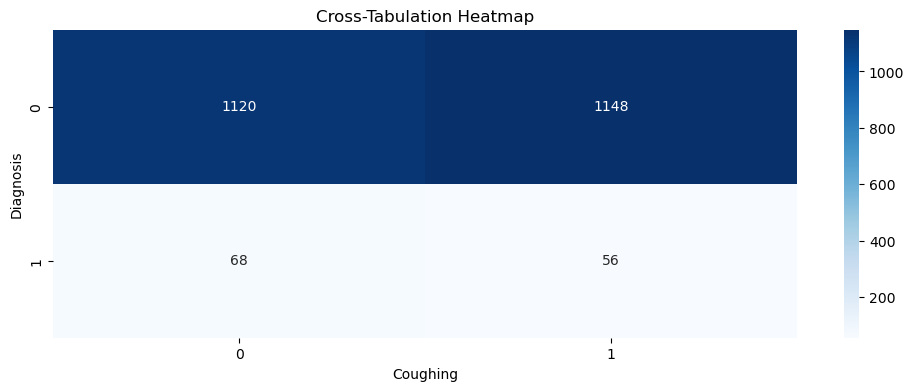

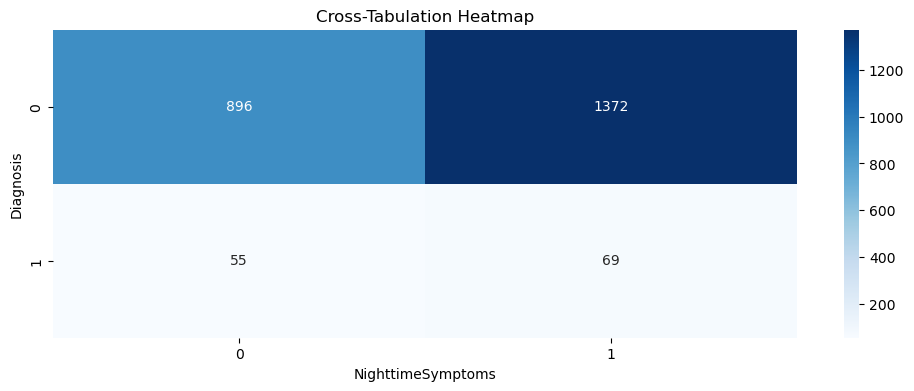

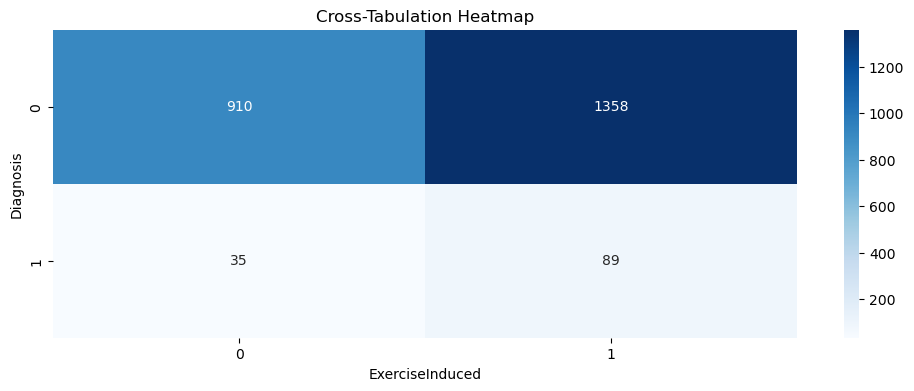

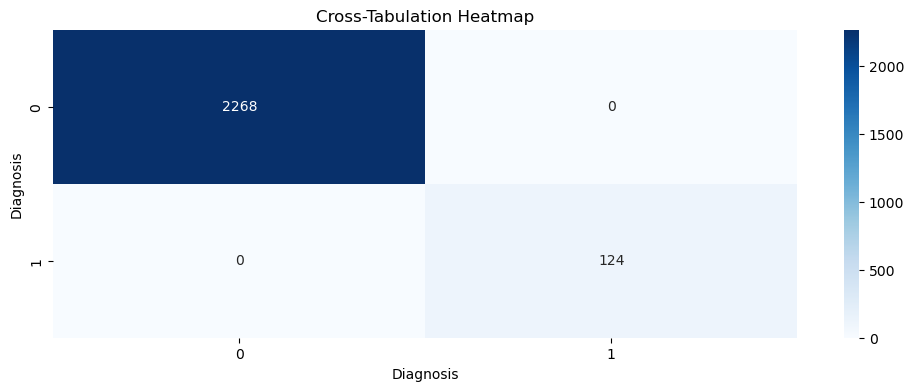

In [22]:
for column in columns_crosstab:
    plot_crosstab(asthma_disease_df, "Diagnosis", column)